In [79]:
c.df <- read.csv('./data/vaccines/vaccines.csv')
c.df <- subset(c.df, vaccine != '')
table(c.df$vaccine)



astrazeneca     moderna        none     novavax      pfizer 
         67        1076       21820         921         829 

In [3]:
library(pivottabler)
library(IRdisplay)

pts <- PivotTable$new()
pts$addData(c.df)
pts$addRowDataGroups("vaccine", totalCaption="All Vaccines")
#pts$addColumnDataGroups("sentiment", totalCaption="All Sentiment")
pts$defineCalculation(calculationName="FN", caption="N.", 
                     summariseExpression="n()")

positiveFilter <- PivotFilters$new(pts, variableName="sentiment", values="positive")
negativeFilter <- PivotFilters$new(pts, variableName="sentiment", values="negative")
neutralFilter <- PivotFilters$new(pts, variableName="sentiment", values="neutral")

pts$defineCalculation(calculationName="PositiveN", summariseExpression="n()", 
                     filters=positiveFilter, visible=FALSE)
pts$defineCalculation(calculationName="NegativeN", summariseExpression="n()", 
                     filters=negativeFilter, visible=FALSE)
pts$defineCalculation(calculationName="NeutralN", summariseExpression="n()", 
                     filters=neutralFilter, visible=FALSE)

pts$defineCalculation(calculationName="Total", summariseExpression="n()", visible=FALSE)

pts$defineCalculation(calculationName="Positive",
                     type="calculation", basedOn=c("PositiveN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$PositiveN/values$Total*100")
pts$defineCalculation(calculationName="Negative",
                     type="calculation", basedOn=c("NegativeN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$NegativeN/values$Total*100")
pts$defineCalculation(calculationName="Neutral",
                     type="calculation", basedOn=c("NeutralN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$NeutralN/values$Total*100")

pts$evaluatePivot()
pts$renderPivot()




HTML widgets cannot be represented in plain text (need html)

In [4]:
ptv <- PivotTable$new()
ptv$addData(c.df)
#ptv$addRowDataGroups("vaccine", totalCaption="All Vaccines")
ptv$addRowDataGroups("sentiment", totalCaption="All Sentiment")
ptv$defineCalculation(calculationName="FN", caption="N.", 
                     summariseExpression="n()")

astrazenecaFilter <- PivotFilters$new(ptv, variableName="vaccine", values="astrazeneca")
modernaFilter <- PivotFilters$new(ptv, variableName="vaccine", values="moderna")
noneFilter <- PivotFilters$new(ptv, variableName="vaccine", values="none")
novavaxFilter <- PivotFilters$new(ptv, variableName="vaccine", values="novavax")
pfizerFilter <- PivotFilters$new(ptv, variableName="vaccine", values="pfizer")

ptv$defineCalculation(calculationName="AstrazenecaN", summariseExpression="n()", 
                     filters=astrazenecaFilter, visible=FALSE)
ptv$defineCalculation(calculationName="ModernaN", summariseExpression="n()", 
                     filters=modernaFilter, visible=FALSE)
ptv$defineCalculation(calculationName="NoneN", summariseExpression="n()", 
                     filters=noneFilter, visible=FALSE)
ptv$defineCalculation(calculationName="NovavaxN", summariseExpression="n()", 
                     filters=novavaxFilter, visible=FALSE)
ptv$defineCalculation(calculationName="PfizerN", summariseExpression="n()", 
                     filters=pfizerFilter, visible=FALSE)

ptv$defineCalculation(calculationName="Total", summariseExpression="n()", visible=FALSE)

ptv$defineCalculation(calculationName="Astrazeneca",
                     type="calculation", basedOn=c("AstrazenecaN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$AstrazenecaN/values$Total*100")
ptv$defineCalculation(calculationName="Moderna",
                     type="calculation", basedOn=c("ModernaN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$ModernaN/values$Total*100")
ptv$defineCalculation(calculationName="None",
                     type="calculation", basedOn=c("NoneN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$NoneN/values$Total*100")
ptv$defineCalculation(calculationName="Novavax",
                     type="calculation", basedOn=c("NovavaxN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$NovavaxN/values$Total*100")
ptv$defineCalculation(calculationName="Pfizer",
                     type="calculation", basedOn=c("PfizerN", "Total"),
                     format="%.1f %%",
                     calculationExpression="values$PfizerN/values$Total*100")

ptv$evaluatePivot()
ptv$renderPivot()


HTML widgets cannot be represented in plain text (need html)

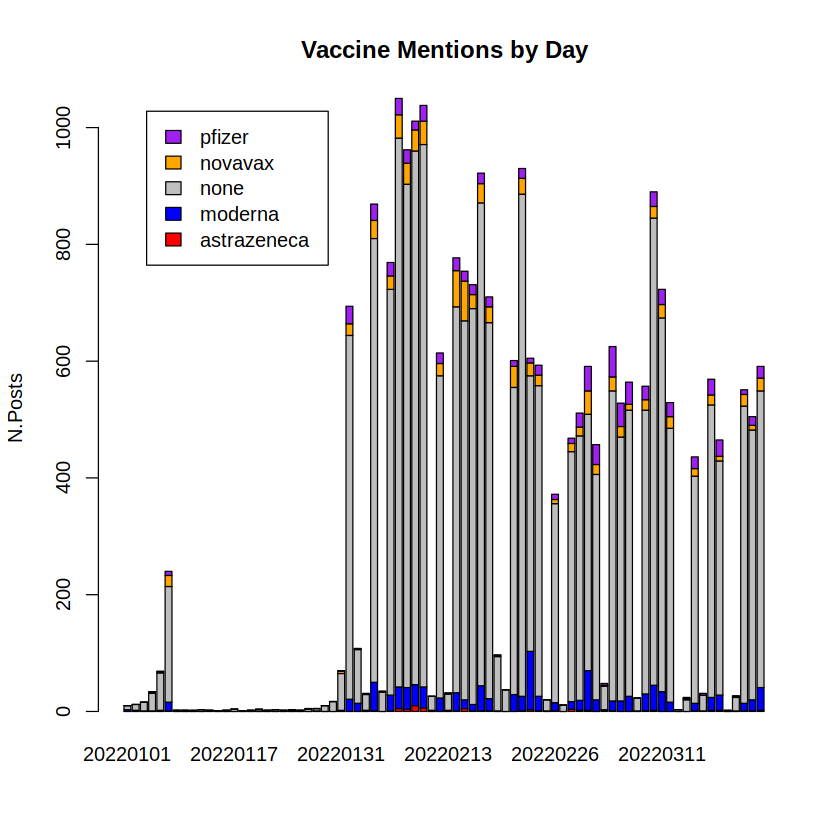

In [7]:
cd.df <- subset(c.df, date >= 20220101 & date <= 20220401)
counts <- table(cd.df$vaccine, cd.df$date)
cols= c("red", 'blue', "grey", 'orange', 'purple')
barplot(counts, main="Vaccine Mentions by Day",
  ylab="N.Posts", 
  col=cols,
  legend=rownames(counts),
  args.legend= list(
    x=30,
    col=cols
  )      
)


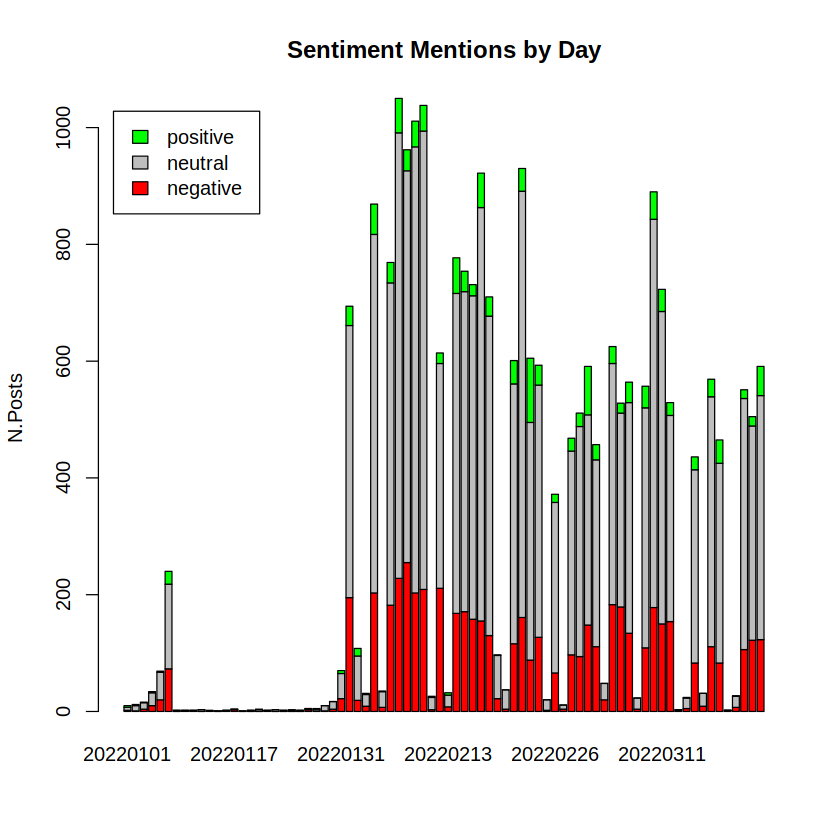

In [6]:
cd.df <- subset(c.df, date >= 20220101 & date <= 20220401)
counts <- table(cd.df$sentiment, cd.df$date)
cols= c("red", 'grey', 'green')
barplot(counts, main="Sentiment Mentions by Day",
  ylab="N.Posts", 
  col=cols,
  legend=rownames(counts),
  args.legend= list(
    x=20,
    col=cols
  )      
)


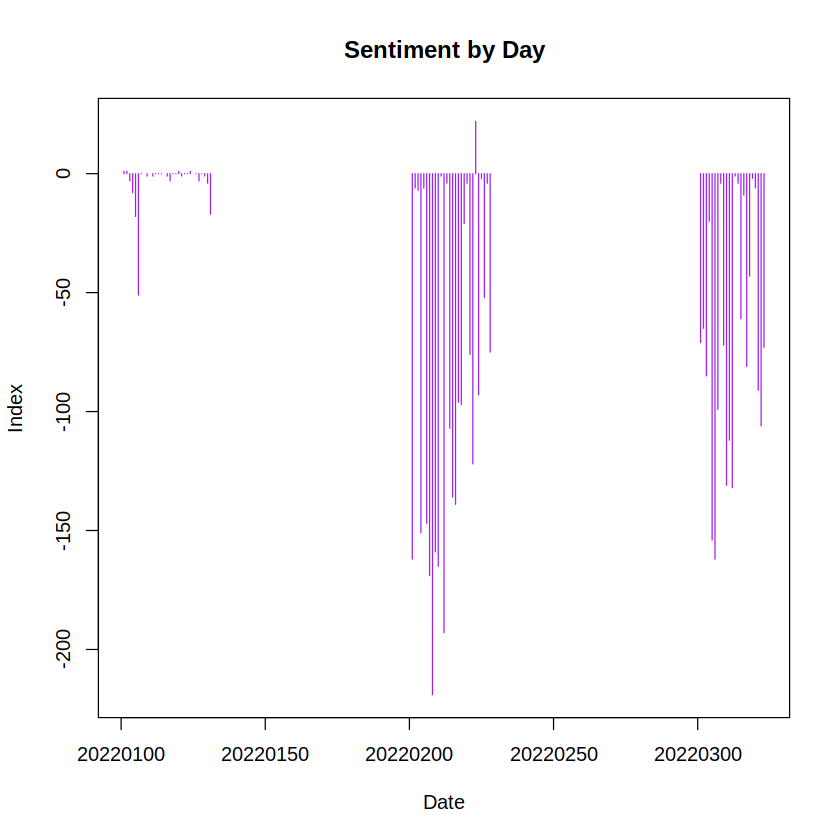

In [74]:
cd.df <- subset(c.df, date >= 20220101 & date <= 20220401)

f <- function (s) {
    if (s == 'neutral') {return(0)}
    if (s == 'positive') {return(1)}
    if (s == 'negative') {return(-1)}
}

cd.df$sentimentvalue <- sapply(cd.df$sentiment, f)
cd.aggr <- aggregate(sentimentvalue ~ date, data = cd.df, sum)

plot(cd.aggr$date, cd.aggr$sentimentvalue, type='h', col='purple', main='Sentiment by Day', ylab='Index', xlab='Date')


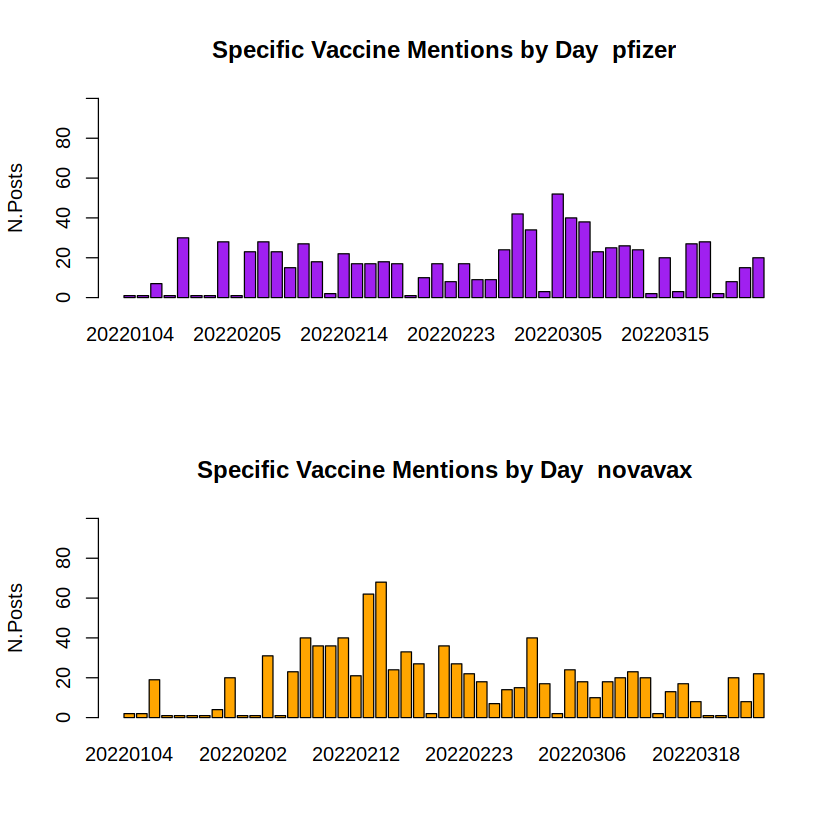

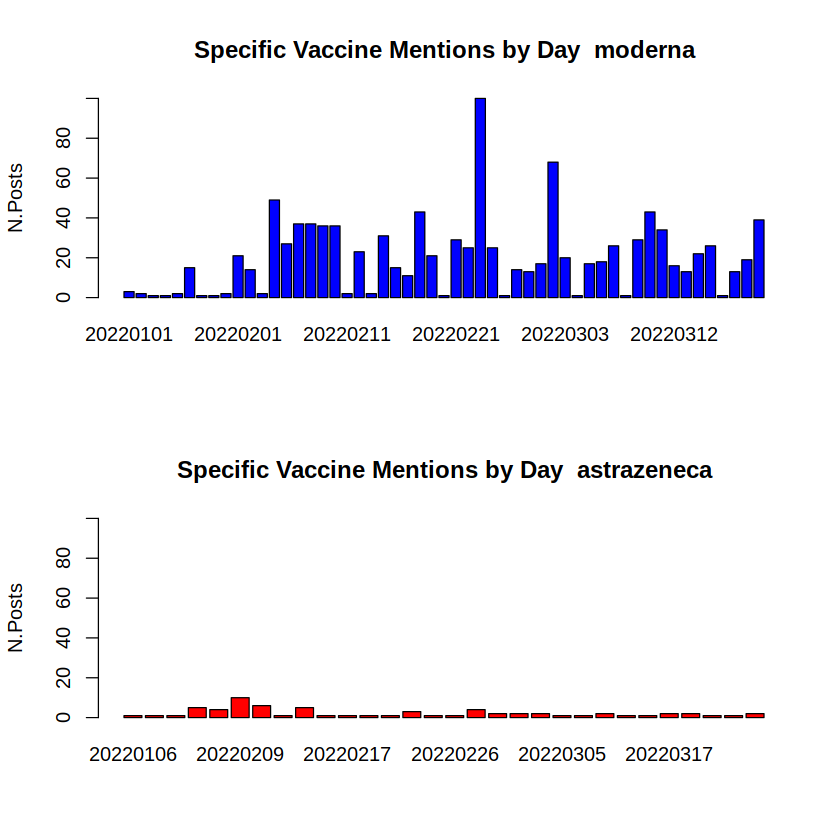

In [78]:
cd.df <- subset(c.df, date >= 20220101 & date <= 20220401)

vaxbar <- function (x, vax, col) {
  df <- subset(x, vaccine == vax)
  counts <- table(df$vaccine, df$date)
  barplot(counts, 
    main=paste("Specific Vaccine Mentions by Day ", vax),
    ylab="N.Posts", 
    col=col,
    ylim=c(0, 100)
 )         
}

par(mfrow=c(2, 1))
vaxbar(cd.df, 'pfizer', 'purple')
vaxbar(cd.df, 'novavax', 'orange')
par(mfrow=c(2, 1))
vaxbar(cd.df, 'moderna', 'blue')
vaxbar(cd.df, 'astrazeneca', 'red')

# According to Wikipedia (https://en.wikipedia.org/wiki/COVID-19_vaccination_in_Australia)
# the number of dese supplied are:
# Pfizer      125 M (mRNA)
# Novavax      51 M (traditional. Novavax was approved on the 20th of Jan '22, and started to 
#                   be administered on the 15th of Feb '22)
# Moderna      25 M (mRNA)
# Astrazeneca  53 M (traditional)
